<a href="https://colab.research.google.com/github/kdstheace/Study_Python_MachineLearning/blob/main/Day0415_Keras_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR10 イメージ分類**
컬러이미이 10종류 제공

In [4]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout #Dropout
from keras.optimizers import Adam #그 외에도 Adadelta, Adamax등이 있다.
from keras.utils import to_categorical #원핫인코딩

from keras.datasets import cifar10

In [5]:
#hyper parameter정의
width = 32
height = 32
channel = 3

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
# print(x_train[0])
print(labels[y_train[0][0]])

frog


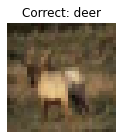

In [10]:
i=3
plt.rcParams['figure.figsize']=(2, 2) #사이즈 조절
plt.imshow(x_train[i]) #이미지 보이기
plt.axis('off')#축 없애기
plt.title('Correct: ' + labels[y_train[i][0]]) #뒤에는 항상 0으로 고정
plt.show()

In [11]:
#스케일링
#1. float 32로 바꾸자.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255.0

In [12]:
#2. y값 원핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(width, height, channel)))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))
##여기까지는 특징 추출

model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)             

In [18]:
#원핫인코딩을 했다면 categorical cross entropy해라
#안했다면 loss='sparse_categorical_crossentropy'
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

#fitting
hist = model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1131 - accuracy: 0.9642
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0760 - accuracy: 0.9745
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0963 - accuracy: 0.9685
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0823 - accuracy: 0.9727
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0778 - accuracy: 0.9745
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0770 - accuracy: 0.9754
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0791 - accuracy: 0.9743
Epoch 8/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0726 - accuracy: 0.9756
Epoch 9/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0738 - accuracy: 0.9760
Epoch 10/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.073

In [ ]:
#학습그래프 그리기

In [19]:
#예측
yhat = model.predict(x_test, batch_size=32)

In [30]:
print(np.argmax(yhat[0]))
print(y_test[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
